# JoIN Table 
> 두개이상의 데이터프레임을 병합해서 사용할 때 이용합니다.

> 근간은 SQL의 join방법과 유사합니다.

#### 라이브러리와 데이터 불러오기 

In [2]:
import pandas as pd 
import os
os.chdir('C:\\Users\\my\\Desktop')

df = pd.read_csv("temp_2021.csv" )
df1 = pd.read_csv("temp_2020.csv")

print(df.head(3))
print("\n")
print(df1.head(3))

              date  temperature  rain  wind  moisture
0  2021-10-01 0:01         19.2   0.0   1.1      83.2
1  2021-10-01 0:02         19.2   0.0   1.1      83.5
2  2021-10-01 0:03         19.1   0.0   1.1      83.9


              date  temperature  wind  moisture
0  2020-10-01 0:01         16.8   2.1      90.5
1  2020-10-01 0:02         16.8   2.0      91.0
2  2020-10-01 0:03         16.8   1.4      90.9


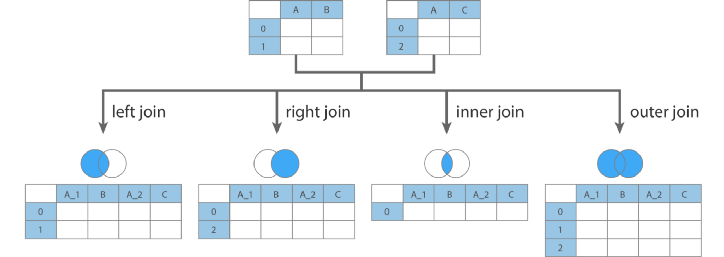

In [10]:
from IPython.display import Image
Image("join.png")

### inner join  
> 두 테이블에서 일치하는 값이 있는 행만 반환 

>df.merge(df1 , on = col)  

In [3]:
temp = df.merge(df1, on = "temperature")
temp.head(3)

,date_x,temperature,rain,wind_x,moisture_x,date_y,wind_y,moisture_y
0,2021-10-01 0:01,19.2,0.0,1.1,83.2,2020-10-01 9:48,2.7,74.8
1,2021-10-01 0:01,19.2,0.0,1.1,83.2,2020-10-01 9:49,2.9,75.0
2,2021-10-01 0:01,19.2,0.0,1.1,83.2,2020-10-01 9:50,1.0,75.8


In [4]:
temp_wind = df.merge(df1, on = ["temperature" , "wind"]) # 일대다 관계 성립 
temp_wind.head(3)

,date_x,temperature,rain,wind,moisture_x,date_y,moisture_y
0,2021-10-01 0:03,19.1,0.0,1.1,83.9,2020-10-03 20:13,65.3
1,2021-10-01 0:05,19.1,0.0,1.1,84.3,2020-10-03 20:13,65.3
2,2021-10-02 9:07,19.1,0.0,1.1,89.3,2020-10-03 20:13,65.3


### lefe join 
>왼쪽 테이블의 모든 행을 반환하고 오른쪽 테이블에서는 왼쪽행과 일치하는 행만 반환 

>df.merge(df1, on =col , how = 'left')

In [5]:
left = df.merge(df1, on = "wind", how ="left")
left.head(3)

,date_x,temperature_x,rain,wind,moisture_x,date_y,temperature_y,moisture_y
0,2021-10-01 0:01,19.2,0.0,1.1,83.2,2020-10-01 3:12,16.3,87.5
1,2021-10-01 0:01,19.2,0.0,1.1,83.2,2020-10-01 4:43,16.0,85.6
2,2021-10-01 0:01,19.2,0.0,1.1,83.2,2020-10-01 4:46,16.0,85.3


### right join
> 오른쪽 테이블의 모든 행을 반환하고 왼쪽테이블에서는 오른쪽행과 일치하는 행만 반환 

>df.merge(df1, on =col , how = 'right')

In [6]:
right = df.merge(df1, on ='temperature',how = 'right')
right.tail(3)

,date_x,temperature,rain,wind_x,moisture_x,date_y,wind_y,moisture_y
6691163,2021-10-22 17:31,15.0,0.0,2.4,39.8,2020-11-01 0:00,3.1,55.9
6691164,2021-10-22 17:32,15.0,0.0,2.7,39.8,2020-11-01 0:00,3.1,55.9
6691165,2021-10-22 17:33,15.0,0.0,2.2,40.0,2020-11-01 0:00,3.1,55.9


### 각 테이블에 병합할 키가 다를때 따로 지정 필요

> df.merge(df1 , how = , left_on = col , right_on = col1)

### outer join 
> 테이블간에 일치항목이 있는지 여부에 관계없이 두테이블의 모든 행을 반환 

>df.merge(df1, how = outer)

In [7]:
outer = df.merge(df1 , how = 'outer')
outer.head(3)

,date,temperature,rain,wind,moisture
0,2021-10-01 0:01,19.2,0.0,1.1,83.2
1,2021-10-01 0:02,19.2,0.0,1.1,83.5
2,2021-10-01 0:03,19.1,0.0,1.1,83.9


### self join 
> 같은 테이블 간의 병합 
>계층적 관계가 있는 테이블 , 순차적관계가 있는 테이블 ,그래프 데이터 등에서 사용 

> df.merge(df)

In [8]:
self = df1.merge(df1, how = 'inner')
self.head((3))

,date,temperature,wind,moisture
0,2020-10-01 0:01,16.8,2.1,90.5
1,2020-10-01 0:02,16.8,2.0,91.0
2,2020-10-01 0:03,16.8,1.4,90.9


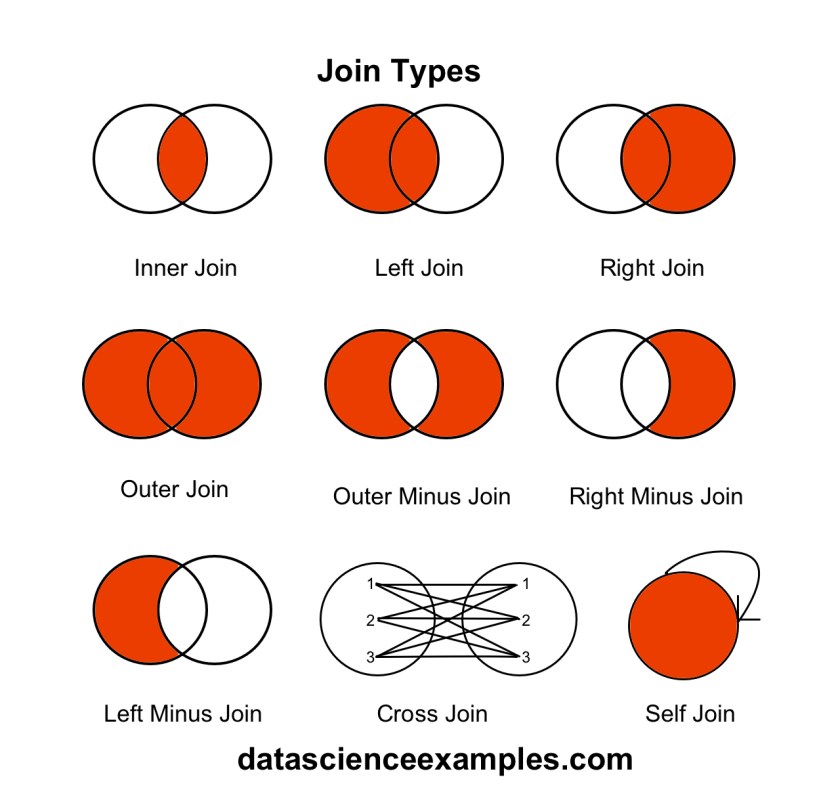

In [9]:
from IPython.display import Image
Image("join_types.png")